# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [31]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

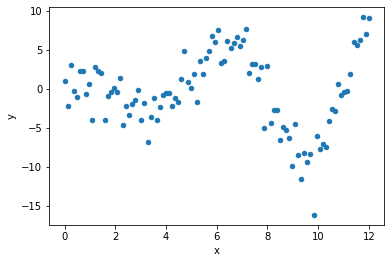

In [26]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [6]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm
#defining X and y variables
y = df['y']
X = df.drop(columns = 'y' ,axis = 1)


## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [11]:
# Your code here - prepare quadratic data and fit a model
from sklearn.preprocessing import PolynomialFeatures
poly_feat_2 = PolynomialFeatures(degree = 2)
X_poly2 = poly_feat_2.fit_transform(df[['x']])
X_squared = pd.DataFrame(X_poly2 ,columns =['intercept','x','x^2'])
X_squared


,intercept,x,x^2
0,1.0,0.000000,0.000000
1,1.0,0.121212,0.014692
2,1.0,0.242424,0.058770
3,1.0,0.363636,0.132231
4,1.0,0.484848,0.235078
...,...,...,...
95,1.0,11.515152,132.598714
96,1.0,11.636364,135.404959
97,1.0,11.757576,138.240588
98,1.0,11.878788,141.105601


In [12]:
#building the quadratic model
import statsmodels.api as sm
squared_model = sm.OLS(y,X_squared) #creating the model
squared_results = squared_model.fit()


In [13]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
print(squared_results.rsquared_adj) #for the adjusted r squared
print(squared_results.pvalues) #for the pvalues


-0.015664188856822303
intercept    0.938055
x            0.893974
x^2          0.967420
dtype: float64


In [14]:
# Your written answer here - summarize findings
"""This is a bad model because the rsquared explaining the variance of our dependent variable y in the model is so small,,actually its negative.
   The coefficients are not statistically significant at an alpha of 0.05.
"""


'This is a bad model because the rsquared explaining the variance of our dependent variable y in the model is so small,,actually its negative.\n   The coefficients are not statistically significant at an alpha of 0.05.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [22]:
# Your code here - prepare 4th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures
polynomial_features_4 = PolynomialFeatures(degree = 4)
X_poly4 = polynomial_features_4.fit_transform(df[['x']])
#Get feature names
feature_names = polynomial_features_4.get_feature_names(input_features=['x'])
#converting the polynomial features into a dataframe
X_quad = pd.DataFrame(X_poly4, columns=feature_names)
X_quad


,1,x,x^2,x^3,x^4
0,1.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.121212,0.014692,0.001781,0.000216
2,1.0,0.242424,0.058770,0.014247,0.003454
3,1.0,0.363636,0.132231,0.048084,0.017485
4,1.0,0.484848,0.235078,0.113977,0.055262
...,...,...,...,...,...
95,1.0,11.515152,132.598714,1526.894287,17582.419065
96,1.0,11.636364,135.404959,1575.621337,18334.502835
97,1.0,11.757576,138.240588,1625.374183,19110.460086
98,1.0,11.878788,141.105601,1676.163508,19910.790766


In [23]:
#building a model
quad_model = sm.OLS(y,X_quad)
quad_results = quad_model.fit()

In [24]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
print(f'quad_results: {quad_results.rsquared_adj}')
print(f'quad_results: {quad_results.pvalues}')


quad_results: 0.566796782011223
quad_results: 1      1.995047e-04
x      1.738988e-10
x^2    3.340296e-14
x^3    1.715785e-16
x^4    7.408453e-18
dtype: float64


In [25]:
# Your written answer here - summarize findings
"""The model is a bit better with it explaining about 57% variance of our dependent variable in our model.
   coefficients are statistically significant with their alpha value being less than 0.05.
"""


'The model is a bit better with it explaining about 57% variance of our dependent variable in our model.\n   coefficients are statistically significant with their alpha value being less than 0.05.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [36]:
# Your code here - prepare 8th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures
polynomial_features_8 = PolynomialFeatures(degree=8)
X_poly8 =polynomial_features_8.fit_transform(df[['x']])
#get feature names out
feature_names = polynomial_features_8.get_feature_names(input_features = ['x'])
#convert the polynomial features into a dataframe
X_poly8 = pd.DataFrame(X_poly8 ,columns = feature_names)
X_poly8


,1,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.121212,0.014692,0.001781,0.000216,0.000026,3.171585e-06,3.844345e-07,4.659812e-08
2,1.0,0.242424,0.058770,0.014247,0.003454,0.000837,2.029814e-04,4.920762e-05,1.192912e-05
3,1.0,0.363636,0.132231,0.048084,0.017485,0.006358,2.312085e-03,8.407583e-04,3.057303e-04
4,1.0,0.484848,0.235078,0.113977,0.055262,0.026794,1.299081e-02,6.298575e-03,3.053855e-03
...,...,...,...,...,...,...,...,...,...
95,1.0,11.515152,132.598714,1526.894287,17582.419065,202464.219537,2.331406e+06,2.684650e+07,3.091415e+08
96,1.0,11.636364,135.404959,1575.621337,18334.502835,213346.942074,2.482583e+06,2.888823e+07,3.361540e+08
97,1.0,11.757576,138.240588,1625.374183,19110.460086,224692.682227,2.641841e+06,3.106165e+07,3.652097e+08
98,1.0,11.878788,141.105601,1676.163508,19910.790766,236516.060008,2.809524e+06,3.337374e+07,3.964396e+08


In [37]:
#building the model
poly8model=sm.OLS(y,X_poly8)
poly8results = poly8model.fit()

In [38]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
print(f'poly8results: {poly8results.rsquared_adj}')
print(f'poly8results: {poly8results.pvalues}')


poly8results: 0.8188676291759818
poly8results: 1      0.683776
x      0.618134
x^2    0.371163
x^3    0.199162
x^4    0.144776
x^5    0.157523
x^6    0.225536
x^7    0.357352
x^8    0.554141
dtype: float64


In [ ]:
# Your written answer here - summarize findings


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

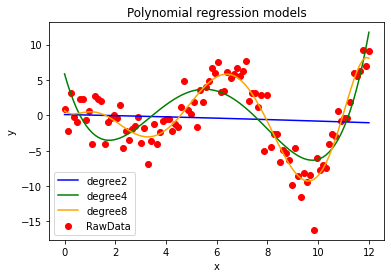

In [39]:
# Your code here
#predict values for each polynomial model
y_pred2 = squared_results.predict(sm.add_constant(X_squared))
y_pred4 = quad_results.predict(sm.add_constant(X_quad))
y_pred8 = poly8results.predict(sm.add_constant(X_poly8))

#scatter plot of the raw data
plt.scatter(df['x'],df['y'],color = 'red',label ='RawData')

#plotting regression line curves
plt.plot(df[['x']],y_pred2, color='blue',label = 'degree2')
plt.plot(df[['x']],y_pred4, color ='green',label = 'degree4')
plt.plot(df[['x']],y_pred8, color = 'orange',label ='degree8')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial regression models')
plt.legend()
plt.show()




### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [40]:
# Your written answer here
"""The model of polynomial degree is not the best,,it has the worst relationship model.
"""


'The model of polynomial degree is not the best,,it has the worst relationship model.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 